In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Problem 1

Exercise 4.1

In [1]:
P = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
  ])

u = np.array([0, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0])
f = np.array([0,  2,  4,  6, 10,  7,  6,  4,  3,  3,  0])

for i in range(100):
  u = np.matmul(P, u)
  for j in range(len(u)):
    u[j] = max(u[j], f[j])
print(u)

[ 0.   2.5  5.   7.5 10.   8.6  7.2  5.8  4.4  3.   0. ]


### Problem 2

Exercise 4.3 (a)

In [2]:
u = np.array([0, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0])
f = np.array([0,  2,  4,  6, 10,  7,  6,  4,  3,  3,  0])
cost = 0.75

for i in range(100):
  u = np.matmul(P, u)
  for j in range(len(u)):
    u[j] = max(u[j] - cost, f[j])
print(u)

[ 0.    2.    4.    6.25 10.    7.25  6.    4.    3.    3.    0.  ]


Exercise 4.3 (b)

In [3]:
u = np.array([0, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0])
f = np.array([0,  2,  4,  6, 10,  7,  6,  4,  3,  3,  0])
discount_rate = 0.95

for i in range(100):
  u = np.matmul(P, u)
  for j in range(len(u)):
    u[j] = max(u[j] * discount_rate, f[j])
print(u)

[ 0.          2.          4.14043584  6.71670702 10.          7.6
  6.          4.55447942  3.58837772  3.          0.        ]


Exercise 4.3 (c) why does solution has different answer??

In [4]:
u = np.array([0, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0])
f = np.array([0,  2,  4,  6, 10,  7,  6,  4,  3,  3,  0])

for i in range(100):
  u = np.matmul(P, u)
  for j in range(len(u)):
    u[j] = max(u[j] * discount_rate - cost, f[j])
print(u)

[ 0.  2.  4.  6. 10.  7.  6.  4.  3.  3.  0.]


### Problem 5

4.8 Consider a simple "Wheel of Fortune" game. A wheel is divided into 12 equal-sized wedges. Eleven of the edges are marked with the numbers 100, 200, . . . , 1100 denoting an amount of money won fi the wheel lands on those numbers. The twelfth wedge is marked "bankrupt." A player can spin as many times as he or she wants. Each time the wheel lands on a numbered wedge, the player receives that much money which is added to h i sher previous winnings. However, fi the wheel ever lands on the "bankrupt" wedge, the player loses all of h i sh e r money that has been won up to that point. The player may quit at any time, and take all the money he or she has won (assuming the "bankrupt" wedge has not come up).
Assuming that the goal is to maximize one's expected winnings in this game, devise an optimal strategy for playing this game and compute one's expected winnings. You may wish to try a computer simulation first.


In [22]:
wedges = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, -1])

raw_data = {}
# number of planned spins
for i in range(1, 200):
  # number of trials
  raw_data[i] = []
  for j in range(1000):
    
    curr_sum = 0
    for k in range(i):
      spin = np.random.choice(wedges)

      if spin == -1:
        break
      curr_sum += spin

    raw_data[i].append(curr_sum)

df = pd.DataFrame(raw_data)
df_transposed = df.T
df_transposed['mean'] = df_transposed.mean(axis=1)
df_mean = df_transposed[['mean']]
df_mean

,mean
1,556.5
2,1056.7
3,1506.1
4,1928.2
5,2320.1
...,...
195,6619.1
196,6492.1
197,6287.8
198,6284.8


<Axes: >

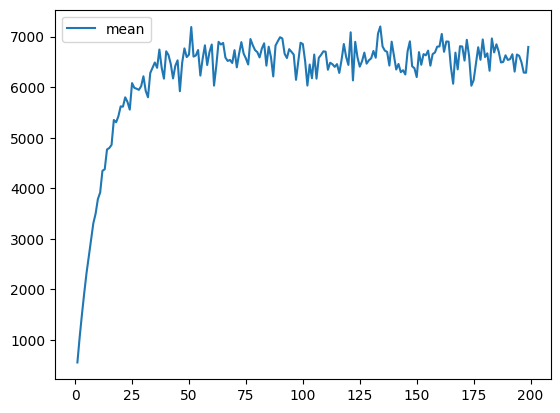

In [23]:
df_mean.plot()

Intuitively, the number of spins that maximize expected value is the point of inflection where the second standard derivation first turns negative. The point of inflections looks to be in the first ~ 15 spins.

In [38]:
raw_data = {}
# number of planned spins
for i in range(1, 25):
  # number of trials
  raw_data[i] = []
  for j in range(10000):
    
    curr_sum = 0
    for k in range(i):
      spin = np.random.choice(wedges)

      if spin == -1:
        break
      curr_sum += spin

    raw_data[i].append(curr_sum)

df = pd.DataFrame(raw_data)
df_transposed = df.T
df_transposed['mean'] = df_transposed.mean(axis=1)
df_mean = df_transposed[['mean']]
df_mean

,mean
1,553.50
2,1057.65
3,1522.75
4,1936.23
5,2306.08
6,2675.38
7,3016.72
8,3329.31
9,3570.86
10,3829.87


<Axes: >

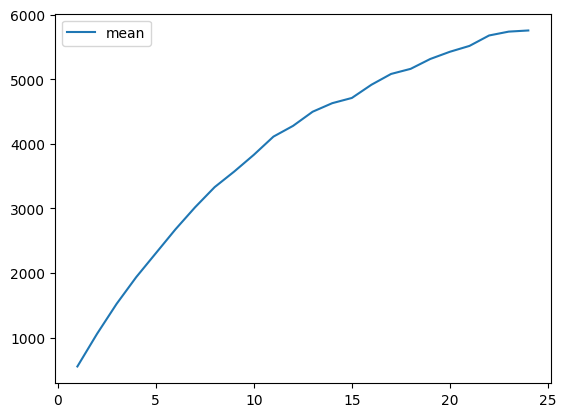

In [39]:
df_mean.plot()

,Thresholds,Average Winnings
0,4000,2332.92
1,4250,2413.31
2,4500,2413.53
3,4750,2469.45
4,5000,2522.07
5,5250,2497.30
6,5500,2540.93
7,5750,2534.95
8,6000,2564.50
9,6250,2553.22


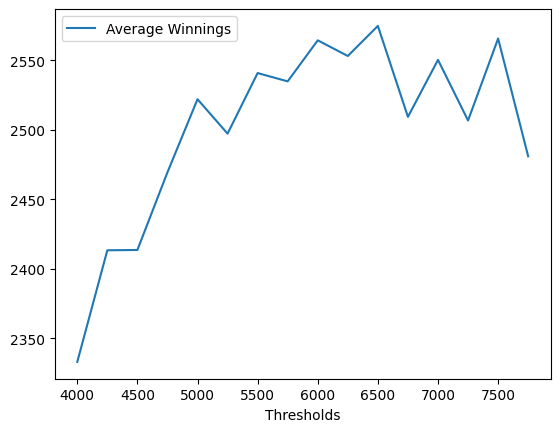

In [52]:
# Define the values on the wheel and the probability of hitting bankrupt
values = np.arange(100, 1200, 100)
bankrupt = 'bankrupt'
wheel = np.append(values, bankrupt)
probabilities = np.full_like(wheel, 1/len(wheel), dtype=np.float64)

# Function to simulate a single game
def simulate_game(threshold):
    total_winnings = 0
    while True:
        spin = np.random.choice(wheel, p=probabilities)
        if spin == bankrupt:
            return 0  # Player loses everything on bankrupt
        else:
            total_winnings += int(spin)
            # The decision to continue will be based on some strategy
            # For now, we stop if the total winnings exceed a certain threshold
            # This threshold can be adjusted to optimize the strategy
            if total_winnings >= threshold:  # Example threshold
                break
    return total_winnings

# Run the simulation multiple times to approximate the expected winnings
num_simulations = 10000

thresholds = []
averages = []
for i in range(4000, 8000, 250):
  results = [simulate_game(i) for _ in range(num_simulations)]
  average_winnings = np.mean(results)
  thresholds.append(i)
  averages.append(average_winnings)

# Calculate the average winnings
df = pd.DataFrame({
    'Thresholds': thresholds,
    'Average Winnings': averages
  })

df.plot(x='Thresholds')
df



Let X be current winnings. Next X ~ expected gains after round with X is 1/12 (100 + 200 + ... + 1100) - 1/12 * X. X is non-positive after 6600, thus, we should stop if X >= 6600. The ideal threshold is 6600. Our simulated data agrees with this.

In [57]:
values = np.arange(100, 1200, 100)
bankrupt = 'bankrupt'
wheel = np.append(values, bankrupt)
probabilities = np.full_like(wheel, 1/len(wheel), dtype=np.float64)

def simulate_game(threshold):
    total_winnings = 0
    while True:
        spin = np.random.choice(wheel, p=probabilities)
        if spin == bankrupt:
            return 0  # Player loses everything on bankrupt
        else:
            total_winnings += int(spin)
            if total_winnings >= threshold:  # Example threshold
                break
    return total_winnings

num_simulations = 1000000

results = [simulate_game(6600) for _ in range(num_simulations)]
average_winnings = np.mean(results)

average_winnings

2564.0224

### Problem 7

Exercise 4.10 (a)

In [12]:
dice = np.array([1, 2, 3, 4, 5, 6])
# v(5) = 5, v(6) = 0

optimal_returns = {5: 5, 6: 0}

def simulation(start):
  roll = start
  sequence = []

  while roll != 6:
    # print(sequence, roll)
    sequence.append(roll)
    # sequence.append(roll)
    roll = np.random.choice(dice)
  return np.max(sequence)

for i in range(1, 5):
  returns = []
  for j in range(250000):
    returns.append(simulation(i))
    # returns.append(simulation(i))
  optimal_returns[i] = np.mean(returns)

# print(optimal_returns)
# print(simulation(1))
print(optimal_returns)

{5: 5, 6: 0, 1: 3.718316, 2: 3.920064, 3: 4.166472, 4: 4.50034}


Exercise 4.10 (b)